Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.3132 - loss: 1.8537 - val_accuracy: 0.5594 - val_loss: 1.2206
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5429 - loss: 1.2810 - val_accuracy: 0.6298 - val_loss: 1.0416
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 0.6110 - loss: 1.0988 - val_accuracy: 0.6891 - val_loss: 0.8804
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6516 - loss: 0.9910 - val_accuracy: 0.7079 - val_loss: 0.8517
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6820 - loss: 0.9039 - val_accuracy: 0.7179 - val_loss: 0.8087
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.6985 - loss: 0.8653 - val_accuracy: 0.7236 - val_loss: 0.8082
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7116 - loss: 0.8209 - val_accuracy: 0.7582 - val_loss: 0.7149
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7241 - loss: 0.7925 - 

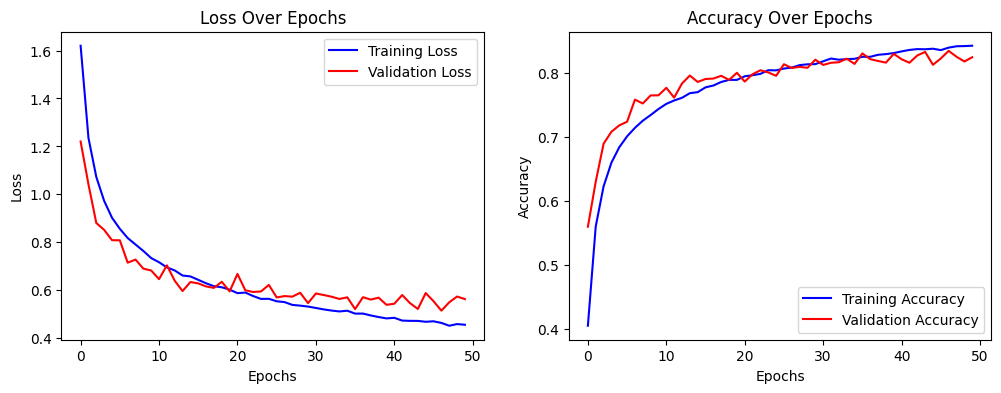

Model: "simple_alex_net_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,420,832 (28.31 MB)

 Trainable params: 2,473,610 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,947,222 (18.87 MB)

In [4]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a simplified AlexNet model
class SimpleAlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleAlexNet((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 50
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.2931 - loss: 1.8903 - val_accuracy: 0.5436 - val_loss: 1.2608
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5105 - loss: 1.3533 - val_accuracy: 0.6058 - val_loss: 1.1017
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5673 - loss: 1.2046 - val_accuracy: 0.6324 - val_loss: 1.0425
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6028 - loss: 1.1166 - val_accuracy: 0.6695 - val_loss: 0.9252
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6290 - loss: 1.0546 - val_accuracy: 0.7073 - val_loss: 0.8322
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6477 - loss: 0.9992 - val_accuracy: 0.7184 - val_loss: 0.8124
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6600 - loss: 0.9620 - val_accuracy: 0.7203 - val_loss: 0.7960
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6700 - loss: 0.9493 - val_accurac

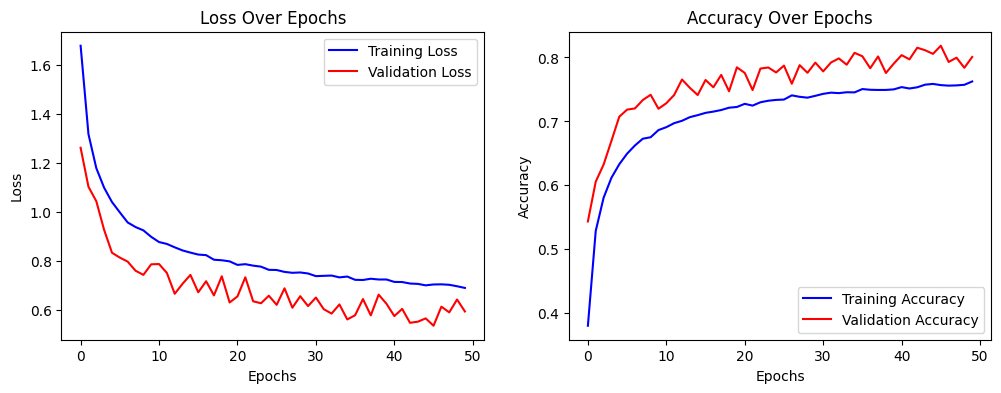

Model: "simple_alex_net_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,420,832 (28.31 MB)

 Trainable params: 2,473,610 (9.44 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,947,222 (18.87 MB)

In [7]:
#Modified ALexNet with CIFAR-10 WITH Dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
num_classes = 10

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a simplified AlexNet model with Dropout
class SimpleAlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(64, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))
        self.add(Dropout(0.25))

        self.add(Conv2D(128, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))
        self.add(Dropout(0.25))

        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))
        self.add(Dropout(0.25))

        self.add(Flatten())
        self.add(Dense(512, activation='relu'))
        self.add(Dropout(0.5))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleAlexNet((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 50
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 53ms/step - accuracy: 0.0099 - loss: 4.6066 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0099 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0102 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.0089 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0094 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.0084 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.0095 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/100
782/782 ━━━━━━━━━

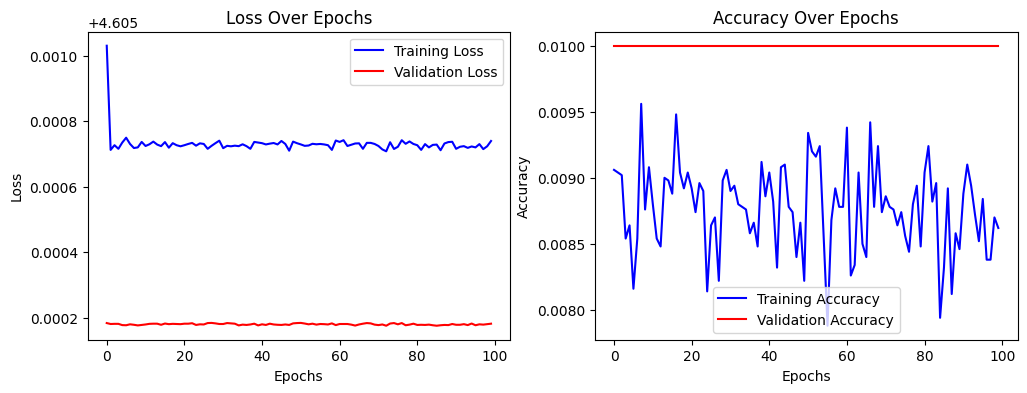

Model: "simple_alex_net_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 192)         │         166,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 192)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 384)           │         663,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         102,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,177,838 (96.05 MB)

 Trainable params: 8,392,612 (32.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,785,226 (64.03 MB)

In [9]:
#MOdified AlexNet with CIFAR 100 without Dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = 100

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define a simplified AlexNet model for CIFAR-100
class SimpleAlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(192, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Flatten())
        self.add(Dense(1024, activation='relu'))
        self.add(Dense(1024, activation='relu'))
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleAlexNet((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


In [ ]:
# Modified AlexNet with CIFAR-100 with Dropout
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
num_classes = 100

# Normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define AlexNet-based model with Dropout
class SimpleAlexNetWithDropout(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()

        self.add(Conv2D(96, kernel_size=(3,3), strides=1, padding='same', activation='relu', input_shape=input_shape))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(192, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(384, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(Conv2D(256, kernel_size=(3,3), strides=1, padding='same', activation='relu'))
        self.add(MaxPooling2D(pool_size=(2,2), strides=2))

        self.add(Flatten())
        self.add(Dense(1024, activation='relu'))
        self.add(Dropout(0.5))  # Dropout added
        self.add(Dense(1024, activation='relu'))
        self.add(Dropout(0.5))  # Dropout added
        self.add(Dense(num_classes, activation='softmax'))

        self.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize model
model = SimpleAlexNetWithDropout((32, 32, 3), num_classes)

# Training parameters
EPOCHS = 100
BATCH_SIZE = 64

# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)
train_generator = train_datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

# Logging for TensorBoard
tensorboard_callback = TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

# Train model
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
    verbose=1
)

# Display final training results
final_train_loss = history.history['loss'][-1]
final_train_acc = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Loss: {final_train_loss:.4f}")
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Display training results graph
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Over Epochs")

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Over Epochs")

plt.show()

# Model summary
model.summary()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 11/782 ━━━━━━━━━━━━━━━━━━━━ 29:11 2s/step - accuracy: 0.0094 - loss: 4.6557